# Рабочая тетрадь - распознавание рукописных цифр

In [1]:
import mnist
# #!pip install scikit-learn


In [2]:
train, validation, test = mnist.load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [3]:
x = train[0].reshape(-1, 28, 28)
y = train[1]

x_validation = validation[0].reshape(-1, 28, 28)
y_validation = validation[1]

In [21]:
y

array([7, 3, 4, ..., 5, 6, 8], shape=(55000,), dtype=uint8)

In [22]:
x.shape

(55000, 28, 28)

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '7')

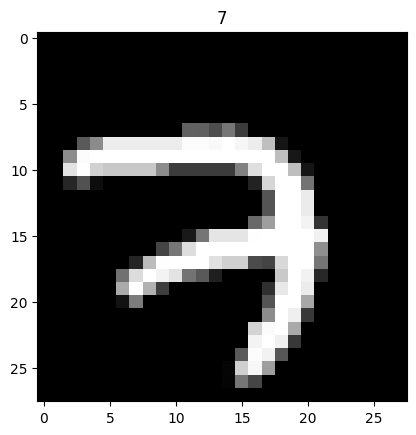

In [23]:
plt.imshow(x[0], cmap="gray")
plt.title(y[0])

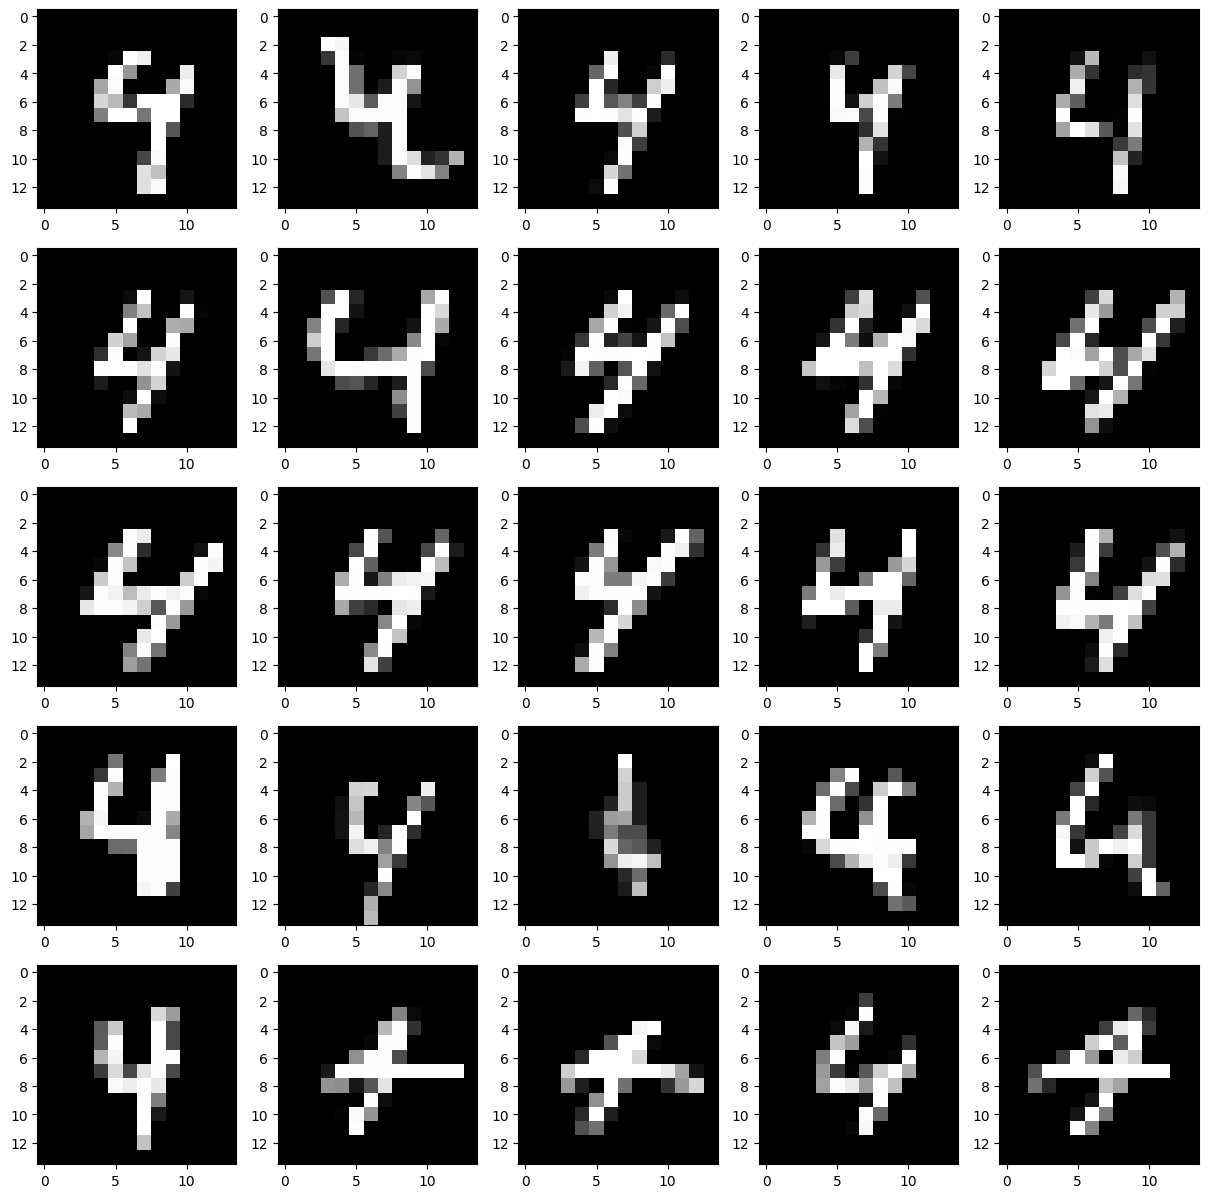

In [45]:
fig, axs = plt.subplots(5,5, figsize=(15,15))
x_subset = x[y==4]
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(x_subset[5*i + j][::2, ::2], cmap="gray")

In [29]:
from sklearn.neighbors import KNeighborsClassifier as kNN

In [30]:
clf = kNN()

In [42]:
clf.fit(x.reshape(-1, 784), y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
%%time
y_pred = clf.predict(x_validation.reshape(-1, 784))

CPU times: total: 1min 21s
Wall time: 26.9 s


In [32]:
x_validation.shape

(5000, 28, 28)

In [35]:
y_pred

array([5, 0, 4, ..., 2, 1, 2], shape=(5000,), dtype=uint8)

In [36]:
y_validation

array([5, 0, 4, ..., 2, 1, 2], shape=(5000,), dtype=uint8)

In [41]:
import numpy as np
np.sum(y_pred != y_validation).item() / len(y_validation)

0.0262

## Ресайзим картинки

In [47]:
clf2 = kNN()
clf2.fit(x[: ,::2,::2].reshape(-1, 14*14), y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
%%time
y_pred2 = clf2.predict(x_validation[: ,::2,::2].reshape(-1, 14*14))

CPU times: total: 17.6 s
Wall time: 7.11 s


In [49]:
np.sum(y_pred2 != y_validation).item() / len(y_validation)

0.0336

## Уменьшение размерности с помощью PCA

In [50]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=16)

In [51]:
pca.fit(x.reshape(-1, 784))

,n_components,16
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [54]:
x_transformed = pca.transform(x.reshape(-1, 784))
x_validation_transformed = pca.transform(x_validation.reshape(-1, 784))

In [55]:
x_transformed.shape, x_validation_transformed.shape

((55000, 16), (5000, 16))

In [56]:
clf3 = kNN()
clf3.fit(x_transformed, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
%%time
y_pred3 = clf3.predict(x_validation_transformed)

CPU times: total: 2.61 s
Wall time: 3.84 s


In [58]:
np.sum(y_pred3 != y_validation).item() / len(y_validation)

0.0284

## Случайный алгоритм

In [72]:
y_pred4 = np.random.randint(low=0, high=10, size=len(y_validation))

In [73]:
y_pred4

array([2, 0, 9, ..., 7, 6, 5], shape=(5000,), dtype=int32)

In [76]:
print("доля правильных ответов (accuracy):", np.sum(y_pred4 == y_validation).item() / len(y_validation))

доля правильных ответов (accuracy): 0.106


# Визуализация с помощью t-SNE

In [4]:
from sklearn.manifold import TSNE

In [5]:
tsne = TSNE(n_components=2)

In [7]:
x_tsne = tsne.fit_transform(x[:2000].reshape(-1, 784))

In [8]:
x_tsne.shape

(2000, 2)

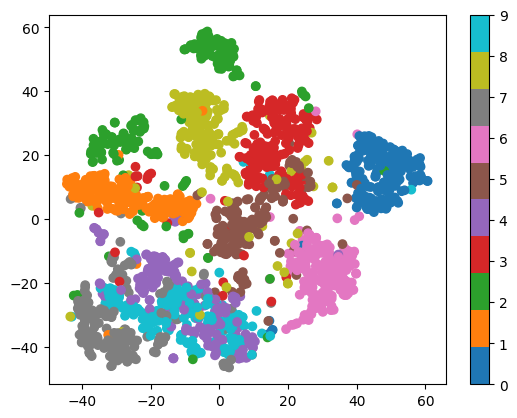

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y[:2000], cmap="tab10")
plt.colorbar()